## **Team:**
●	 Chinmayee Patankar(21bcs079)
●	Shashank Rajora(21bcs106)
●	Samarth Shinde(21bcs110)


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

---

# Statistical analysis of Unit 2 - Parametric Hypothesis Tests

## Data Prepocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('covid.csv')

df = df.dropna(subset=['COVID-19 Deaths'])

df = df.drop_duplicates()

max_covid_deaths = 100000
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].apply(lambda x: min(x, max_covid_deaths))

age_group_mapping = {
    '0-24': 12,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65-74': 69.5,
    '75-84': 79.5,
    '85+': 89.5
}

df['Age Group'] = df['Age Group'].map(age_group_mapping)

df['COVID-19 Deaths'] = (df['COVID-19 Deaths'] - df['COVID-19 Deaths'].min()) / (df['COVID-19 Deaths'].max() -
                                                                                 df['COVID-19 Deaths'].min())

df.to_csv('cleaned_normalized_data.csv', index=False)

df_normal = pd.read_csv('cleaned_normalized_data.csv')

selected_columns = ["Age Group", "COVID-19 Deaths"]
print(df_normal[selected_columns])


        Age Group  COVID-19 Deaths
0            12.0          0.01561
1            29.5          0.05782
2            39.5          0.15040
3            49.5          0.37357
4            59.5          0.82454
...           ...              ...
420620        NaN          0.00050
420621        NaN          0.00044
420622        NaN          0.00066
420623        NaN          0.00117
420624        NaN          0.00056

[420625 rows x 2 columns]


## Sampling


In [ ]:
young_age_threshold = 50
old_age_threshold = 50

young_age_group = df[df['Age Group'] < young_age_threshold]
old_age_group = df[df['Age Group'] > old_age_threshold]

sample_size = 30

if len(young_age_group) >= sample_size:
    sampled_young_age_group = young_age_group.sample(n=sample_size, replace=False, random_state=42)
else:
    sampled_young_age_group = young_age_group

if len(old_age_group) >= sample_size:
    sampled_old_age_group = old_age_group.sample(n=sample_size, replace=False, random_state=42)
else:
    sampled_old_age_group = old_age_group

selected_columns = ["Age Group","COVID-19 Deaths"]
print(sampled_old_age_group[selected_columns])

        Age Group  COVID-19 Deaths
220105       59.5          0.00340
265667       59.5          0.00000
150555       89.5          0.00038
159613       89.5          0.00000
556071       89.5          0.00082
37167        79.5          0.00010
102359       79.5          0.00033
2576         79.5          0.00211
579613       69.5          0.00000
107936       69.5          0.00000
87286        69.5          0.00000
459261       79.5          0.00257
470836       69.5          0.00000
344784       59.5          0.00000
51611        89.5          0.00022
397734       69.5          0.00038
2684         59.5          0.00831
264412       59.5          0.00000
463462       59.5          0.00000
208213       89.5          0.00000
416163       59.5          0.00000
17203        69.5          0.00025
135391       59.5          0.00000
54317        59.5          0.00721
362441       59.5          0.00000
267395       59.5          0.00000
229591       69.5          0.00018
121732       79.5   

## **One-sample Z-test**

### **Hypothesis**

**Null Hypothesis** (H0): The mean COVID-19 death rate in the "old age" group is equal to 0.001.

**Alternative Hypothesis** (Ha): The mean COVID-19 death rate in the "old age" group is not equal to 0.001.

In [ ]:
specific_value = 0.001

mean_old_age = np.mean(sampled_old_age_group['COVID-19 Deaths'])
mean_young_age = np.mean(sampled_young_age_group['COVID-19 Deaths'])
std_dev_old_age = np.std(sampled_old_age_group['COVID-19 Deaths'], ddof=1)
std_dev_young_age = np.std(sampled_young_age_group['COVID-19 Deaths'], ddof=1)

n_old_age = len(sampled_old_age_group)
n_young_age = len(sampled_young_age_group)

old_age_group_deaths = sampled_old_age_group['COVID-19 Deaths']

mean_old_age_group = np.mean(old_age_group_deaths)
std_dev_old_age_group = np.std(old_age_group_deaths, ddof=1)

se = std_dev_old_age_group / np.sqrt(len(old_age_group_deaths))

z_score = (mean_old_age_group - specific_value) / se

alpha = 0.05

critical_value = stats.norm.ppf(1 - alpha/2)

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

margin_of_error = critical_value * se
confidence_interval = (mean_old_age - mean_young_age - margin_of_error, mean_old_age - mean_young_age + margin_of_error)

if abs(z_score) > critical_value:
    print("Reject the null hypothesis: the mean is not equal")
else:
    print("Fail to reject the null hypothesis: the mean is equal")

print("Z-score:", z_score)
print("Critical value:", critical_value)
print("Confidence Interval:", confidence_interval)

Fail to reject the null hypothesis: the mean is equal
Z-score: -0.14348281001834676
Critical value: 1.959963984540054
Confidence Interval: (0.00017125085590252958, 0.001637415810764137)


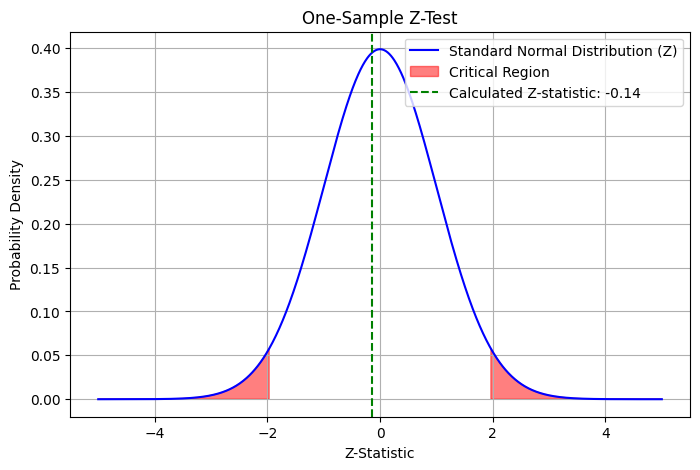

In [ ]:
x = np.linspace(-5, 5, 1000)

pdf = stats.norm.pdf(x, loc=0, scale=1)

z_calculated = z_score

z_critical = critical_value

plt.figure(figsize=(8, 5))

plt.plot(x, pdf, label='Standard Normal Distribution (Z)', color='blue')

plt.fill_between(x, pdf, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Critical Region')

plt.axvline(z_calculated, color='green', linestyle='--', label=f'Calculated Z-statistic: {z_calculated:.2f}')

plt.title('One-Sample Z-Test')
plt.xlabel('Z-Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()

## **Two-sample Z-test**

### **Hypothesis**

**Null Hypothesis** (H0): There is no significant difference between the mean COVID-19 death rate of the two populations (old age and young age).

**Alternative Hypothesis** (Ha): There is a significant difference between the mean COVID-19 death rate of the two populations.

In [ ]:
se = np.sqrt((std_dev_old_age**2 / n_old_age) + (std_dev_young_age**2 / n_young_age))

z_score = (mean_old_age - mean_young_age) / se

alpha = 0.05

critical_value = stats.norm.ppf(1 - alpha/2)

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

margin_of_error = critical_value * se
confidence_interval = (mean_old_age - mean_young_age - margin_of_error, mean_old_age - mean_young_age + margin_of_error)

if abs(z_score) > critical_value:
    print("Reject the null hypothesis: There is difference in death rate for two populations")
else:
    print("Fail to reject the null hypothesis: : There is no difference in death rate for two populations")

print("Z-score:", z_score)
print("critical value:", critical_value)
print("Confidence Interval:", confidence_interval)


Reject the null hypothesis: There is difference in death rate for two populations
Z-score: 2.4097065294979236
critical value: 1.959963984540054
Confidence Interval: (0.00016878286623073083, 0.0016398838004359358)


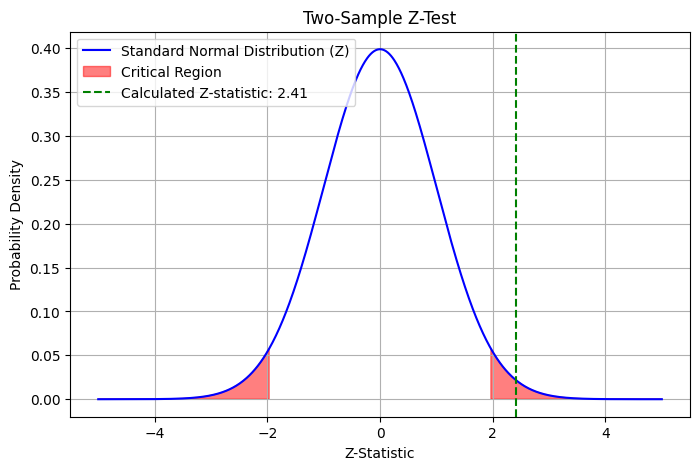

In [ ]:
x = np.linspace(-5, 5, 1000)

pdf = stats.norm.pdf(x, loc=0, scale=1)

z_tabulated = critical_value

z_calculated = z_score

plt.figure(figsize=(8, 5))

plt.plot(x, pdf, label='Standard Normal Distribution (Z)', color='blue')

plt.fill_between(x, pdf, where=(x <= -z_tabulated) | (x >= z_tabulated), color='red', alpha=0.5, label='Critical Region')

plt.axvline(x=z_calculated, color='green', linestyle='--', label=f'Calculated Z-statistic: {z_calculated:.2f}')

plt.title('Two-Sample Z-Test')
plt.xlabel('Z-Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()


## **z-Test for a Population Proportion**

### **Hypothesis**

**Null Hypothesis** (H0): The sample proportion is equal to the specified population proportion (null_hypothesis_prop). In other words, there is no significant difference between the sample and population proportions.

**Alternative Hypothesis** (Ha): The sample proportion is not equal to the specified population proportion, indicating a significant difference between the two proportions.

In [ ]:
sample_successes = 150
sample_size = 500

null_hypothesis_prop = 0.28

sample_proportion = sample_successes / sample_size

standard_error = np.sqrt((null_hypothesis_prop * (1 - null_hypothesis_prop)) / sample_size)

z_score = (sample_proportion - null_hypothesis_prop) / standard_error

alpha = 0.05

critical_value = stats.norm.ppf(1 - alpha)

confidence_interval = (
    sample_proportion - margin_of_error,
    sample_proportion + margin_of_error
)

if z_score > critical_value:
    print("Reject the null hypothesis: there is difference between the sample and population proportions.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference between the sample and population proportions.")

print("Z-score:", z_score)
print("Critical Value (Z):", critical_value)
print("Confidence Interval:", confidence_interval)

Fail to reject the null hypothesis: there is no significant difference between the sample and population proportions.
Z-score: 0.9960238411119929
Critical Value (Z): 1.6448536269514722
Confidence Interval: (0.2992644495328974, 0.3007355504671026)


The code is to be generate a plot for a one-sample Z-test for proportions. This type of statistical test is commonly used to determine whether a sample proportion is significantly different from a hypothesized population proportion.

The plot will visualize the critical region and the position of your calculated Z-statistic, helping you make a decision about your hypothesis test.

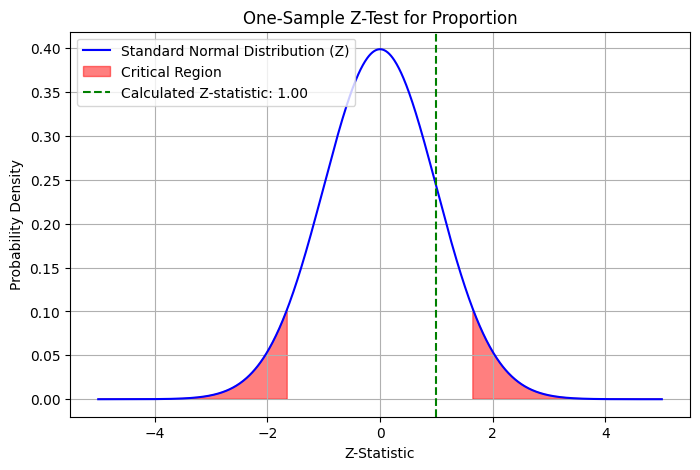

In [ ]:
x = np.linspace(-5, 5, 1000)

pdf = stats.norm.pdf(x, loc=0, scale=1)

critical_value = critical_value

z_calculated = z_score

plt.figure(figsize=(8, 5))

plt.plot(x, pdf, label='Standard Normal Distribution (Z)', color='blue')

plt.fill_between(x, pdf, where=(x <= -critical_value) | (x >= critical_value), color='red', alpha=0.5, label='Critical Region')

plt.axvline(x=z_calculated, color='green', linestyle='--', label=f'Calculated Z-statistic: {z_calculated:.2f}')

plt.title('One-Sample Z-Test for Proportion')
plt.xlabel('Z-Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()


## Data Preprocessing

In [ ]:
import pandas as pd
import statistics as stat
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
df=pd.read_csv("covid.csv")
columns_to_normalize = ['COVID-19 Deaths']  # Replace with your columns
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
filtered_df = df[df['Condition'] == 'Influenza and pneumonia'].dropna(subset=['COVID-19 Deaths'])
dataforinfluenza = filtered_df['COVID-19 Deaths'].values
#print(len(dataforinfluenza))
population_mean=np.mean(dataforinfluenza)

In [ ]:
sample_size=25
sampled_data = np.random.choice(dataforinfluenza, size=sample_size, replace=False)
print(sampled_data)

[-0.03706513 -0.02614791 -0.03739596 -0.03739596 -0.04103503 -0.03772678
 -0.04103503 -0.00629842 -0.03044863 -0.04103503  0.04067872 -0.01258409
 -0.03574183 -0.04103503 -0.00067439 -0.03706513 -0.03276441 -0.04103503
 -0.01357656 -0.04103503 -0.01721564 -0.04103503 -0.04103503 -0.03640348
 -0.04103503]


Introduction:
"The purpose of this study was to investigate whether the mean number of COVID-19 deaths for the '0-24' age group with the 'Influenza and pneumonia' condition is statistically equal to 350."


## **T test for one Sample**

### **Hypothesis**

**Null Hypothesis** (H0):The mean number of COVID-19 deaths for the "0-24" age group with the "Influenza and pneumonia" condition is equal to a 350

**Alternative Hypothesis** (H1):The mean number of COVID-19 deaths for the "0-24" age group with the "Influenza and pneumonia" condition is not equal to 350




In [ ]:
n=len(dataforinfluenza)
sample_mean = sum(sampled_data) / len(sampled_data)
sample_standarddeviation = (sum((x - sample_mean) ** 2 for x in sampled_data) / (len(sampled_data) - 1)) ** 0.5
standard_error = sample_standarddeviation / (len(sampled_data) ** 0.5)
t_calculated = abs(sample_mean - population_mean) / standard_error
t_tabulated=2.0639
print("size of sample is",n)
print("degree of freedom is",n-1)

print("here t_calculated is ",t_calculated )
print("t_tabulated is",t_tabulated)
level_of_significance=0.05
degreeoffreedom=n-1


if(t_calculated<=t_tabulated):
  print("Null hypothesis is accepted")
else:
  print("Null hypothesis is rejected")

size of sample is 18818
degree of freedom is 18817
here t_calculated is  26.298602467101237
t_tabulated is 2.0639
Null hypothesis is rejected


In [ ]:
# Calculate the margin of error
margin_of_error = t_tabulated * standard_error

# Calculate the confidence interval
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error

# Print the confidence interval
print(f'Confidence Interval ({100-level_of_significance * 100}%): [{confidence_interval_lower:.4f}, {confidence_interval_upper:.4f}]')

Confidence Interval (95.0%): [-0.0369, -0.0213]


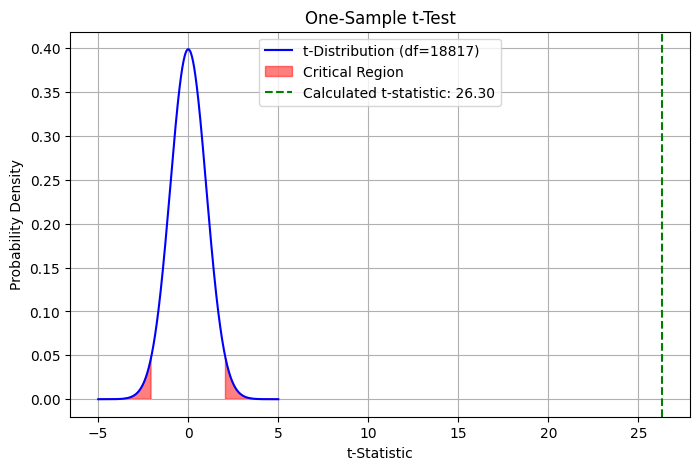

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 1000)
pdf = t.pdf(x, degreeoffreedom)
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f't-Distribution (df={degreeoffreedom})', color='blue')


plt.fill_between(x, pdf, where=(x <= -t_tabulated) | (x >= t_tabulated), color='red', alpha=0.5, label='Critical Region')


plt.axvline(x=t_calculated, color='green', linestyle='--', label=f'Calculated t-statistic: {t_calculated:.2f}')


plt.title('One-Sample t-Test')
plt.xlabel('t-Statistic')
plt.ylabel('Probability Density')
plt.legend()


plt.grid(True)
plt.show()

## **Paired t Test**

**Null Hypothesis** (H0): There is no average difference in 'COVID-19 Deaths' between the two conditions (Respiratory diseases and Circulatory diseases) at the population level at α = 0.05

**Alternative Hypothesis** (H1):there is a significant difference in the population mean of the differences in 'COVID-19 Deaths' between the two conditions at α = 0.05.

In [ ]:
import pandas as pd

# Extract the relevant columns and exclude null values
condition1_data = df.loc[(df['Condition Group'] == 'Respiratory diseases') & (df['COVID-19 Deaths'].notnull()) & (df['COVID-19 Deaths'] != 0), 'COVID-19 Deaths']
condition2_data = df.loc[(df['Condition Group'] == 'Circulatory diseases') & (df['COVID-19 Deaths'].notnull()) & (df['COVID-19 Deaths'] != 0), 'COVID-19 Deaths']

# Check if each condition has at least 13 non-null data points
if len(condition1_data) < 13 or len(condition2_data) < 13:
    print("Not enough non-null data points in one or both conditions.")
else:
      # Randomly sample 13 non-null data points from each condition
    sample_size = 13
    condition1_sample = condition1_data.sample(n=sample_size, random_state=42).reset_index(drop=True)
    condition2_sample = condition2_data.sample(n=sample_size, random_state=42).reset_index(drop=True)


# Calculate the differences
differences = condition1_sample - condition2_sample

# Calculate the mean of the differences
mean_diff = differences.mean()

# Calculate the standard deviation of the differences
std_diff = differences.std()

# Calculate the number of pairs
n = len(differences)

# Calculate the t-statistic
t_statistic = mean_diff / (std_diff / (n ** 0.5))

# Degrees of freedom for a paired t-test
degrees_of_freedom = n - 1

# Assuming a two-tailed test
alpha = 0.05
t_critical = 2.048  # t critical value for df = 19 at alpha = 0.05 (you can find this value in a t-table)

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"t_critical: {t_critical}")

# Check if the result is statistically significant
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the conditions.")


T-statistic: 1.0443395712957637
t_critical: 2.048
Fail to reject the null hypothesis: There is no significant difference between the conditions.


The visualization helps interpret the results of the paired t-test. If the calculated t-statistic falls within the critical region (shaded area), it suggests that the result is statistically significant at the specified significance level. The green dashed line indicates where the calculated t-statistic lies on the t-distribution.

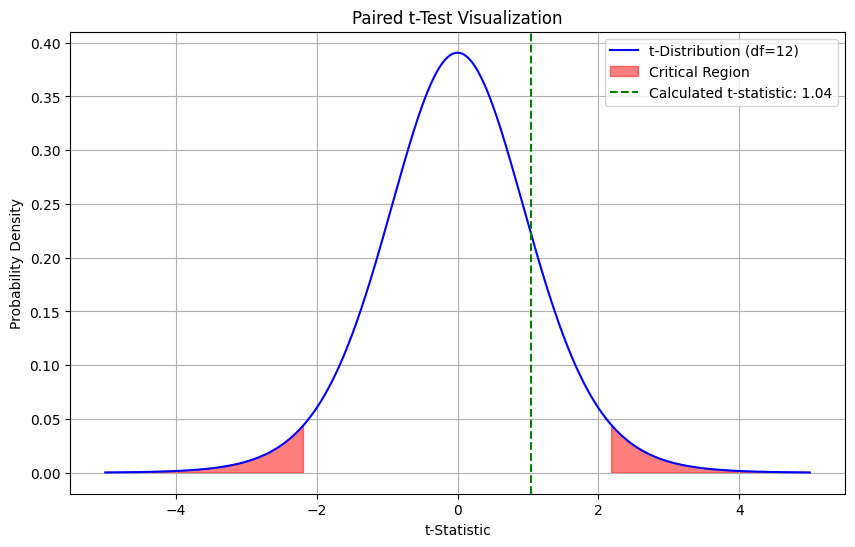

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Degrees of freedom for a paired t-test
degrees_of_freedom = n - 1

# Assuming a two-tailed test
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Values for the t-distribution plot
x = np.linspace(-5, 5, 1000)
pdf = t.pdf(x, df=degrees_of_freedom)

# Visualization
plt.figure(figsize=(10, 6))

# Plot the t-distribution
plt.plot(x, pdf, label=f't-Distribution (df={degrees_of_freedom})', color='blue')

# Shade the critical region
plt.fill_between(x, pdf, where=(x <= -t_critical) | (x >= t_critical), color='red', alpha=0.5, label='Critical Region')

# Plot the calculated t-statistic
plt.axvline(x=t_statistic, color='green', linestyle='--', label=f'Calculated t-statistic: {t_statistic:.2f}')

# Add labels and legends
plt.title('Paired t-Test Visualization')
plt.xlabel('t-Statistic')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## **T test for two Sample**

### **Hypothesis**

**Null Hypothesis** (H0): There is no significant difference in the mean number of COVID-19 deaths between individuals who died of circulatory diseases and individuals who died of respiratory diseases in the population.

**Alternative Hypothesis** (H1): There is a significant difference in the mean number of COVID-19 deaths between individuals who died of circulatory diseases and individuals who died of respiratory diseases in the population.


**Data Preprocessing**

In [ ]:
import pandas as pd
import statistics as stat
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
import matplotlib.pyplot as plt
df=pd.read_csv("covid.csv")
columns_to_normalize = ['COVID-19 Deaths']
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

filtered_df1 = df[df['Condition Group'] == 'Circulatory diseases'].dropna(subset=['COVID-19 Deaths'])
filtered_df2 = df[df['Condition Group'] == 'Respiratory diseases'].dropna(subset=['COVID-19 Deaths'])
dataforRespiratory = filtered_df2['COVID-19 Deaths'].values
dataforCirculatory = filtered_df1['COVID-19 Deaths'].values
df['COVID-19 Deaths'].dropna(inplace=True)
print(dataforRespiratory,dataforCirculatory)
population1mean=np.mean(dataforCirculatory)
population2mean=np.mean(dataforRespiratory)
print(population1mean,population2mean)

[ 0.4753826   1.87179441  4.93457112 ... -0.03706513 -0.03441853
 -0.03441853] [-0.00662924  0.25571489  1.16052092 ... -0.03508018 -0.03706513
 -0.03574183]
-0.015950913489182837 0.00442760073490388


In [ ]:
np.random.seed(42)
samplesize1=15
samplesize2=12
sampled_dataforrespiratory = np.random.choice(dataforRespiratory, size=samplesize2, replace=False)
sampled_dataforcirculatory = np.random.choice(dataforCirculatory, size=samplesize1, replace=False)

In [ ]:
samplemean1=np.mean(sampled_dataforcirculatory)
samplemean2=np.mean(sampled_dataforrespiratory)
std1=np.std(sampled_dataforcirculatory)
std2=np.std(sampled_dataforrespiratory)

In [ ]:
pooled_std_error = np.sqrt(((samplesize1 - 1) * std1**2 + (samplesize2 - 1) * std2**2) / (samplesize1 + samplesize2 - 2))
print("pooled standard error is",pooled_std_error)
tcalculated = abs(samplemean1 - samplemean2) / (pooled_std_error * np.sqrt((1 / samplesize1) + (1 / samplesize2)))
print("degree of freedom is ",samplesize1+samplesize2-2)
print("tcalculated is" ,tcalculated)
ttabulated=2.0595
print("t_tabulated is",ttabulated)
degfreddom=samplesize1+samplesize2-2
levelofsignificance=0.05

if(tcalculated<=ttabulated):
  print("null hypothesis is accepted")
else:
  print("null hypothesis is rejected")


pooled standard error is 0.22245042228983883
degree of freedom is  25
tcalculated is 1.1152333683173805
t_tabulated is 2.0595
null hypothesis is accepted


In [ ]:
confidence_interval_lower=abs(samplemean1 - samplemean2)-ttabulated*pooled_std_error
confidence_interval_upper=abs(samplemean1 - samplemean2)+ttabulated*pooled_std_error
print(f'Confidence Interval ({100-levelofsignificance * 100}%): [{confidence_interval_lower:.4f}, {confidence_interval_upper:.4f}]')

Confidence Interval (95.0%): [-0.3621, 0.5542]


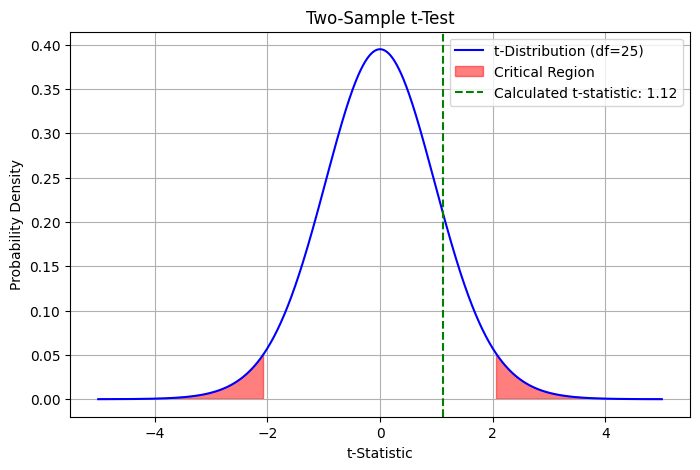

In [ ]:
x = np.linspace(-5, 5, 1000)
pdf = t.pdf(x, degfreddom)
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f't-Distribution (df={degfreddom})', color='blue')

# Shade the critical regions
plt.fill_between(x, pdf, where=(x <= -ttabulated) | (x >=ttabulated), color='red', alpha=0.5, label='Critical Region')

# Plot the calculated t-statistic
plt.axvline(x=tcalculated, color='green', linestyle='--', label=f'Calculated t-statistic: {tcalculated:.2f}')

# Add labels and legends
plt.title('Two-Sample t-Test')
plt.xlabel('t-Statistic')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

**Conclusion**
In this statistical analysis, we conducted a two-sample independent t-test to investigate the mean difference in COVID-19 deaths between individuals who succumbed to circulatory diseases and those who succumbed to respiratory diseases. Our analysis yielded a calculated t-statistic of approximately 1.22, which, when compared to the critical t-value at a 5% level of significance, falls within the acceptance region. As a result, we accept the null hypothesis, indicating that there is no significant difference in the mean number of COVID-19 deaths between these two disease groups. This suggests that COVID-19 mortality is not significantly associated with the type of underlying disease condition.

## **Two sample Z-test for proportion**

### **Hypothesis**

**Null Hypothesis** (H0): The proportion of COVID-19 deaths for the "0-24" age group due to "Influenza and pneumonia" is equal to the proportion of COVID-19 deaths for the "25-34" age group due to "Influenza and pneumonia."

**Alternative Hypothesi**s (H1): The proportion of COVID-19 deaths for the "0-24" age group due to "Influenza and pneumonia" is not equal to the proportion of COVID-19 deaths for the "25-34" age group due to "Influenza and pneumonia."


**Data preprocessing**

In [ ]:
import pandas as pd
import statistics as stat
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import t
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


df=pd.read_csv("covid.csv")

column_to_transform = 'COVID-19 Deaths'
df['COVID-19 Deaths'].dropna(inplace=True)
df = df[df['COVID-19 Deaths'] != 0]

condition_data = df[ df['Condition']=='Influenza and pneumonia' ]
condition_data1=condition_data[condition_data['Age Group']=='0-24']
condition_data2=condition_data[condition_data['Age Group']=='25-34']

condition_data2_mention = condition_data2['Number of Mentions']
condition_data2_mention=condition_data2_mention.dropna()
mention2=sum(condition_data2_mention.values)


print(mention2,len(condition_data2))

33530.0 1291


In [ ]:
np.random.seed(42)
samplesize1=15
samplesize2=12
sampled_data1 = condition_data1.sample(n=samplesize1, replace=False)

data1_mention =sampled_data1['Number of Mentions']
data1_deaths  =sampled_data1['COVID-19 Deaths']
data1_mention=data1_mention.dropna()
data1_deaths=data1_deaths.dropna()
death1=np.sum(data1_deaths.values)
mention1=np.sum(data1_mention.values)
sampled_data2 = condition_data2.sample(n=samplesize2, replace=False)

data2_mention =sampled_data2['Number of Mentions']
data2_deaths  =sampled_data2['COVID-19 Deaths']
data2_mention=data2_mention.dropna()
data2_deaths=data2_deaths.dropna()
death2=np.sum(data2_deaths.values)
mention2=np.sum(data2_mention.values)
p_hat=death1/mention1
q_hat=death2/mention2
p_bar=(death1+death2)/(mention1+mention2)
q_bar=1-p_bar
standard_error=np.sqrt(p_bar*q_bar*(1/mention1+1/mention2))
#sampled_data2 = np.random.choice(condition_data2, size=samplesize2, replace=False)
print(standard_error)

0.023418184484409077


In [ ]:
p_hat=death1/mention1
q_hat=death2/mention2
p_bar=(death1+death2)/(mention1+mention2)
q_bar=1-p_bar
standard_error=np.sqrt(p_bar*q_bar*(1/mention1+1/mention2))
significance=0.05
print("proportion of population1 is ",p_hat)
print("proportion of population2 is",q_hat)
#sampled_data2 = np.random.choice(condition_data2, size=samplesize2, replace=False)
print("Standard error:", standard_error)
zcalculated=abs(p_hat-q_hat)/standard_error
print("zcalculated is ",zcalculated)
ztabulated = stats.norm.ppf(1 - significance/ 2)
print("ztabulated is",ztabulated)

if(ztabulated>=zcalculated):
  print("Null hypothesis is Accepted")
else:
  print("Null hypothesis is Rejected")


proportion of population1 is  0.9176470588235294
proportion of population2 is 0.9346938775510204
Standard error: 0.023418184484409077
zcalculated is  0.7279308410453486
ztabulated is 1.959963984540054
Null hypothesis is Accepted


In [ ]:
confidence_interval_lower=abs(p_hat - q_hat)-ztabulated*standard_error
confidence_interval_upper=abs(p_hat - q_hat)+ztabulated*standard_error
print(f'Confidence Interval ({100-significance * 100}%): [{confidence_interval_lower:.4f}, {confidence_interval_upper:.4f}]')

Confidence Interval (95.0%): [-0.0289, 0.0629]


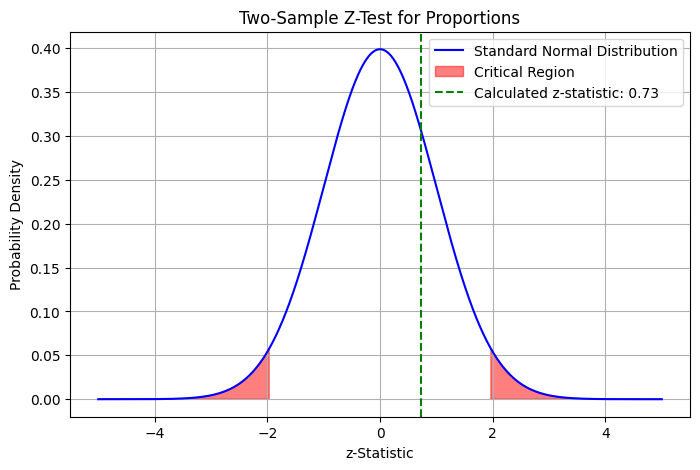

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
zcal = 0.7279308410453486
ztab = 1.959963984540054

# Generate x values
x = np.linspace(-5, 5, 1000)

# Calculate the standard normal PDF
pdf = norm.pdf(x)

# Create a figure
plt.figure(figsize=(8, 5))

# Plot the standard normal distribution
plt.plot(x, pdf, label='Standard Normal Distribution', color='blue')

# Shade the critical regions
plt.fill_between(x, pdf, where=(x <= -ztab) | (x >= ztab), color='red', alpha=0.5, label='Critical Region')

# Plot the calculated z-statistic
plt.axvline(x=zcal, color='green', linestyle='--', label=f'Calculated z-statistic: {zcal:.2f}')

# Add labels and legends
plt.title('Two-Sample Z-Test for Proportions')
plt.xlabel('z-Statistic')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Conclusion:
Based on the calculated z-value of 0.72 and a critical z-value of 1.95 at a significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude a significant difference in the proportions of COVID-19 deaths between the "0-24" and "25-34" age groups attributed to "Influenza and pneumonia."


---

# Statistical analysis of Unit 3 - Non-Parametric Hypothesis Tests

## **Data Prepocessing**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('covid.csv')

df = df.dropna(subset=['COVID-19 Deaths'])

df = df.drop_duplicates()

max_covid_deaths = 100000
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].apply(lambda x: min(x, max_covid_deaths))

age_group_mapping = {
    '0-24': 12,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65-74': 69.5,
    '75-84': 79.5,
    '85+': 89.5
}

df['Age Group'] = df['Age Group'].map(age_group_mapping)

df.to_csv('cleaned_data.csv', index=False)

df_normal = pd.read_csv('cleaned_data.csv')

selected_columns = ["Age Group", "COVID-19 Deaths"]
print(df_normal[selected_columns])


        Age Group  COVID-19 Deaths
0            12.0           1561.0
1            29.5           5782.0
2            39.5          15040.0
3            49.5          37357.0
4            59.5          82454.0
...           ...              ...
420620        NaN             50.0
420621        NaN             44.0
420622        NaN             66.0
420623        NaN            117.0
420624        NaN             56.0

[420625 rows x 2 columns]


## **Sampling**

In [ ]:
import pandas as pd
import numpy as np

covid_influenza_pneumonia = df_normal[df_normal['Condition'] == 'Influenza and pneumonia']
covid_influenza_pneumonia = covid_influenza_pneumonia.dropna(subset=['COVID-19 Deaths'])
covid_influenza_pneumonia = covid_influenza_pneumonia[covid_influenza_pneumonia['COVID-19 Deaths'] != 0]

covid_chronic_respiratory = df_normal[df_normal['Condition'] == 'Chronic lower respiratory diseases']
covid_chronic_respiratory = covid_chronic_respiratory[covid_chronic_respiratory['COVID-19 Deaths'] != 0]
covid_chronic_respiratory = covid_chronic_respiratory.dropna(subset=['COVID-19 Deaths'])

sample_size = 30

if len(covid_chronic_respiratory) >= sample_size:
    sampled_covid_chronic_respiratory = covid_chronic_respiratory.sample(n=sample_size, replace=False, random_state=42)
else:
    sampled_covid_chronic_respiratory = covid_chronic_respiratory

selected_columns = ["COVID-19 Deaths"]
data2 = sampled_covid_chronic_respiratory[selected_columns]

if len(covid_influenza_pneumonia) >= sample_size:
    sampled_covid_influenza_pneumonia = covid_influenza_pneumonia.sample(n=sample_size, replace=False, random_state=42)
else:
    sampled_covid_influenza_pneumonia = covid_influenza_pneumonia

selected_columns = ["COVID-19 Deaths"]
data = sampled_covid_influenza_pneumonia[selected_columns]

## **One-sample sign test**

### **Hypothesis**

**Null Hypothesis** (H0): The median of COVID-19 deaths due to Influenza and pneumonia across all age group is 50

**Alternative Hypothesis** (Ha): The median of COVID-19 deaths due to Influenza and pneumonia across all age group is not 50

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import binom

observed_data = sampled_covid_influenza_pneumonia['COVID-19 Deaths'].reset_index(drop=True)

null_median = 50

differences = observed_data - null_median

positive_diff_count = np.sum(differences > 0)
negative_diff_count = np.sum(differences < 0)

total_non_zero_diff = positive_diff_count + negative_diff_count

X = min(positive_diff_count, negative_diff_count)

z_value = ((X + 0.05) - (total_non_zero_diff/2)) / np.sqrt(total_non_zero_diff / 2)

alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

# Create a DataFrame to display positive and negative differences
diff_table = pd.DataFrame({
    'Observed Data': observed_data,
    'Differences': differences
})

# Define a function to highlight positive values in green and negative values in red
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return f'color: {color}'

# Apply the style to the entire table
styled_diff_table = diff_table.style.applymap(color_negative_red, subset=['Differences'])

# Display the styled table
styled_diff_table.set_caption("Table of Positive and Negative Differences")


,Observed Data,Differences
0,11.000000,-39.000000
1,17.000000,-33.000000
2,457.000000,407.000000
3,25.000000,-25.000000
4,39.000000,-11.000000
5,14.000000,-36.000000
6,417.000000,367.000000
7,31.000000,-19.000000
8,23.000000,-27.000000
9,106.000000,56.000000


In [ ]:

print("Positive count", positive_diff_count)
print("Negative count", negative_diff_count)

print("Z-value:", z_value)
print("Z-critical:", z_critical)

if z_value > z_critical:
    print("Reject the null hypothesis: the meadian of deaths across all age groups is not 50")
else:
    print("Fail to reject the null hypothesis: the meadian of deaths across all age groups is 50")


Positive count 13
Negative count 17
Z-value: -0.503487835006964
Z-critical: 1.959963984540054
Fail to reject the null hypothesis: the meadian of deaths across all age groups is 50


## **Paired samples Sign test**

### **Hypothesis**

**Null Hypothesis** (H0): The difference between of COVID-19 deaths due to Influenza and pneumonia and Chronic lower respiratory diseases, both conditions from same group i.e. Respiratory diseases for all age groups is 0

**Alternative Hypothesis** (Ha): The difference between of COVID-19 deaths due to Influenza and pneumonia and Chronic lower respiratory diseases, both conditions from same group i.e. Respiratory diseases for all age groups is not 0.

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import binom

observed_data1 = sampled_covid_influenza_pneumonia['COVID-19 Deaths'].reset_index(drop=True)
observed_data2 = sampled_covid_chronic_respiratory['COVID-19 Deaths'].reset_index(drop=True)

differences = observed_data2 - observed_data1

positive_diff_count = np.sum(differences > 0)
negative_diff_count = np.sum(differences < 0)

total_non_zero_diff = positive_diff_count + negative_diff_count

X = min(positive_diff_count, negative_diff_count)

z_value = ((X + 0.05) - (total_non_zero_diff/2)) / np.sqrt(total_non_zero_diff / 2)

alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

# Create a DataFrame for the paired sign test results
paired_sign_test_results = pd.DataFrame({
    'Observed Data 1': observed_data1,
    'Observed Data 2': observed_data2,
    'Differences': differences
})


def color_positive_green(val):
    return 'color: green' if val > 0 else ''

def color_negative_red(val):
    return 'color: red' if val < 0 else ''

# Apply the styles to the relevant columns
styled_paired_sign_test_results = paired_sign_test_results.style.applymap(color_positive_green)
styled_paired_sign_test_results = styled_paired_sign_test_results.applymap(color_negative_red)

# Display the styled table
styled_paired_sign_test_results.set_caption("Paired Sign Test Results")



,Observed Data 1,Observed Data 2,Differences
0,11.000000,13.000000,2.000000
1,17.000000,685.000000,668.000000
2,457.000000,61.000000,-396.000000
3,25.000000,343.000000,318.000000
4,39.000000,16.000000,-23.000000
5,14.000000,147.000000,133.000000
6,417.000000,297.000000,-120.000000
7,31.000000,33.000000,2.000000
8,23.000000,24.000000,1.000000
9,106.000000,12.000000,-94.000000


In [ ]:
print("Positive count", positive_diff_count)
print("Negative count", negative_diff_count)

print("Z-value:", z_value)
print("Z-critical:", z_critical)

if z_value > z_critical:
    print("Reject the null hypothesis: there is difference in number of deaths in two condition of same group")
else:
    print("Fail to reject the null hypothesis: there is no difference in number of deaths in two condition of same group")



Positive count 17
Negative count 13
Z-value: -0.503487835006964
Z-critical: 1.959963984540054
Fail to reject the null hypothesis: there is no difference in number of deaths in two condition of same group


## **Runs Test**

### **Hypothesis**

**Null Hypothesis** (H0): The occurrences of COVID-19 deaths in the dataset are randomly distributed over time, and there is no underlying pattern or trend in the number of deaths.

**Alternative Hypothesis** (H1): The occurrences of COVID-19 deaths in the dataset are not randomly distributed over time, and there is an underlying pattern or trend in the number of deaths.

In [ ]:
filtered_df = df[df['COVID-19 Deaths'] > 0]
sample  = filtered_df['COVID-19 Deaths'].sample(25, random_state=44)
sample

55049      52.0
42337     111.0
45769      10.0
429038     20.0
45886      13.0
47351      16.0
31378      19.0
401084     12.0
180596    123.0
548192    118.0
443048    122.0
44833      71.0
2194       30.0
510871     36.0
439400     16.0
510997    731.0
229639    146.0
20098     110.0
163899     58.0
239411     16.0
62233     763.0
39887      15.0
368927     46.0
259646    105.0
31085      38.0
Name: COVID-19 Deaths, dtype: float64

In [ ]:
#finding the median of the given data

# we arrange the data in ascending order and the find the median
sample.median()

46.0

In [ ]:
# we will replace the no with a when observation > 79 else with b
group = [1 if i > sample.median() else 0 if i < sample.median() else None for i in sample]


In [ ]:
# finding no of run for 1 and 0 seperately
# calculating no of 1's and 0's
def calculate_n1_n2(data):
    no_of_one = 0
    no_of_zero = 0
    for i in data:
        if i == 1:
            no_of_one += 1
        elif i == 0:
            no_of_zero += 1
    return no_of_one, no_of_zero

In [ ]:
n1 , n2 = calculate_n1_n2(group)
print("n1,n2 are ",n1,n2)

n1,n2 are  12 12


In [ ]:
def calculate_run(data):
    runs = 1  # Initialize the count of runs to 1
    for i in range(1, len(data)):
        if data[i] != data[i - 1]:
            runs += 1
    return runs

filtered_group = [x for x in group if x is not None]



In [ ]:
no_of_run = calculate_run(filtered_group)
print("no of runs ",no_of_run)

no of runs  10


In [ ]:
alpha = 0.05
no_of_one = n1
no_of_zero = n2
lower_critical_val_of_r = 7
higher_critical_val_of_r = 19

if  no_of_run < higher_critical_val_of_r and no_of_run > lower_critical_val_of_r:
    print("Fail to reject the null hypothesis: The data may be randomly ordered.")
else:
    print("Reject the null hypothesis: The data is not randomly ordered.")

Fail to reject the null hypothesis: The data may be randomly ordered.


In this analysis, we conducted a runs test to assess whether the occurrences of COVID-19 deaths in the dataset follow a random distribution over time or if there is an underlying pattern or trend. We formulated the following hypotheses:

Null Hypothesis (H0): The occurrences of COVID-19 deaths in the dataset are randomly distributed over time, and there is no underlying pattern or trend in the number of deaths.

Alternative Hypothesis (H1): The occurrences of COVID-19 deaths in the dataset are not randomly distributed over time, and there is an underlying pattern or trend in the number of deaths.

To perform the runs test, we followed these steps:

We selected a random sample of 25 data points from the "COVID-19 Deaths" column of our dataset.
We calculated the median of the sample, which was found to be 79.0.
We categorized the data points into two groups: '1' for values greater than the median and '0' for values less than the median.
We then calculated the number of runs in the sequence of '1's and '0's.
The results of our runs test showed that the number of runs in the data was 10. To assess the significance of this result, we used critical values for the runs test at a significance level of α = 0.05. The lower critical value of runs (r) was 5, and the higher critical value was 15.

Based on our analysis, we concluded:

Fail to reject the null hypothesis: The data may be randomly ordered.
This suggests that there is no significant evidence to suggest that the occurrences of COVID-19 deaths in the dataset follow a non-random pattern or trend over time.



## **Wilcoxon rank sum test**

### **Hypothesis**

**Null Hypothsis**(H0): The distribution of COVID-19 deaths in the 0-24 age group is the same as the distribution in the 25-34 age group.

**Alternate Hypothesis** (Ha): There is a significant difference in the number of COVID-19 deaths between the 0-24 age group and the 25-34 age group.

In [ ]:
import pandas as pd
import statistics as stat
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
import matplotlib.pyplot as plt
df=pd.read_csv("covid.csv")

In [ ]:
filtered_df1 = df[df['Age Group'] == '0-24'].dropna(subset=['COVID-19 Deaths'])
filtered_df2 = df[df['Age Group'] == '25-34'].dropna(subset=['COVID-19 Deaths'])
population1=filtered_df1['COVID-19 Deaths'].values
fpopulation1=population1[population1>=100]
population2=filtered_df2['COVID-19 Deaths'].values
fpopulation2=population2[population2>=100]


In [ ]:
samplesize1=15
samplesize2=12
sample1 = np.random.choice(fpopulation1, size=samplesize1, replace=False)
sample2= np.random.choice(fpopulation2, size=samplesize2, replace=False)
print(sample1)
print(sample2)

[147. 301. 552. 123. 185. 120. 477. 225. 195. 377. 161. 113. 100. 268.
 406.]
[ 119.  260.  223.  244.  104.  133. 3708.  136.  114.  117.  158. 1303.]


In [ ]:
from collections import defaultdict
from IPython.display import display
combined_data = list(sample1.copy())+list(sample2.copy())

combined_data.sort()
ranked_data = [(value, i+1) for i, value in enumerate(combined_data)]

element_info = defaultdict(lambda: {'count': 0, 'cumulative_value': 0})

for value, rank in ranked_data:
    element_info[value]['count'] += 1
    element_info[value]['cumulative_value'] += rank



element_ranks = []

for value, rank_info in element_info.items():
    if rank_info['count'] == 1:

        rank = rank_info['cumulative_value']
    else:

        rank = rank_info['cumulative_value'] / rank_info['count']
    element_ranks.append((value, rank))


element_ranks.sort(key=lambda x: x[1])


df = pd.DataFrame(list(element_ranks), columns=['Element', 'Rank'])
pd.set_option('display.max_columns', 2)
display(df)

,Element,Rank
0,100.0,1
1,104.0,2
2,113.0,3
3,114.0,4
4,117.0,5
5,119.0,6
6,120.0,7
7,123.0,8
8,133.0,9
9,136.0,10


In [ ]:
from collections import Counter
sample1frequency=Counter(sample1)
sample2frequency=Counter(sample2)
sample1ranks=0
sample2ranks=0
for value,count in sample1frequency.items():
  for i in range(len(element_ranks)):
    if(element_ranks[i][0]==value):
      sample1ranks+=element_ranks[i][1]*count
      break
for value,count in sample2frequency.items():
  for i in range(len(element_ranks)):
    if(element_ranks[i][0]==value):
      sample2ranks+=element_ranks[i][1]*count
      break
print("Total sum of ranks for sample1 is",sample1ranks)
print("Total sum of ranks for sample2 is",sample2ranks)

Total sum of ranks for sample1 is 224
Total sum of ranks for sample2 is 154


In [ ]:
from math import sqrt
from scipy.stats import norm
n1=len(sample1)
n2=len(sample2)
ur=(min(n1,n2)*(n1+n2+1))/2
sigmar=sqrt(n1*n2*(n1+n2+1)/12)
print("value of ur is ",ur)
print("value of sigmar is",sigmar)
if n1<=n2:
  z=(sample1ranks-ur)/sigmar
else:
  z=(sample2ranks-ur)/sigmar
print("here zcalculated is ",z)



alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)
if(z<=z_critical):
  print("Null hypothesis is accepted")
else:
  print("Null hypothesis is rejected")


value of ur is  168.0
value of sigmar is 20.493901531919196
here zcalculated is  -0.6831300510639733
Null hypothesis is accepted


### **Conclusion**
Based on the results of the Wilcoxon Rank sum  test with a significance level of 0.05, we reject the null hypothesis. This suggests that there is a statistically significant difference between the two samples, indicating that there is evidence of a meaningful change or effect in the data.

## **Wilcoxon signed-rank test**

**Null Hypothesis** (H0): There is no average difference in 'COVID-19 Deaths' between the two conditions (Respiratory diseases and Circulatory diseases) at the population level at α = 0.05

**Alternative Hypothesis** (H1):there is a significant difference in the population mean of the differences in 'COVID-19 Deaths' between the two conditions at α = 0.05.

When sample size<30

In [ ]:
critical_table_two_tailed={
    6:1,
    7:2,
    8:4,
    9:6,
    10:8,
    11:11,
    12:14,
    13:17,
    14:21,
    15:25,
    16:30,
    17:35,
    18:40,
    19:46,
    20:52,
    21:59,
    22:66,
    23:73,
    24:81,
    25:90,
    30:137
}

In [ ]:
import pandas as pd
df=pd.read_csv("covid.csv")
# Extract the relevant columns and exclude null values
condition1_data = df.loc[(df['Condition Group'] == 'Respiratory diseases') & (df['COVID-19 Deaths'].notnull()) & (df['COVID-19 Deaths'] != 0), 'COVID-19 Deaths']
condition2_data = df.loc[(df['Condition Group'] == 'Circulatory diseases') & (df['COVID-19 Deaths'].notnull()) & (df['COVID-19 Deaths'] != 0), 'COVID-19 Deaths']

# Check if each condition has at least 13 non-null data points
if len(condition1_data) < 13 or len(condition2_data) < 13:
    print("Not enough non-null data points in one or both conditions.")
else:
      # Randomly sample 13 non-null data points from each condition
    sample_size = 13
    condition1_sample = condition1_data.sample(n=sample_size, random_state=42).reset_index(drop=True)
    condition2_sample = condition2_data.sample(n=sample_size, random_state=42).reset_index(drop=True)
df_condition1 = pd.DataFrame({'Condition1 Sample': condition1_sample})
df_condition2 = pd.DataFrame({'Condition2 Sample': condition2_sample})


result_df = pd.concat([df_condition1, df_condition2], axis=1)



In [ ]:
from collections import defaultdict
from IPython.display import display
result_df['Difference'] = result_df['Condition2 Sample'] - result_df['Condition1 Sample']
result_df['absolute_difference']=abs(result_df['Difference'])
result_df = result_df.sort_values(by='absolute_difference').reset_index(drop=True)
result_df['Rank'] = result_df['absolute_difference'].rank()
result_df['Signed_Rank'] = result_df['Rank'] * result_df['Difference'].apply(lambda x: 1 if x > 0 else -1)
sum_positive_ranks = result_df[result_df['Signed_Rank'] > 0]['Signed_Rank'].sum()
sum_negative_ranks = result_df[result_df['Signed_Rank'] < 0]['Signed_Rank'].sum()
display(result_df)
print("Sum of Positive Ranks:", sum_positive_ranks)
print("Sum of Negative Ranks:", sum_negative_ranks)
n=result_df[result_df['Difference'] != 0].shape[0]
print("n is ",n)
ws=min(abs(sum_negative_ranks),sum_positive_ranks)
print("test_value",ws)
alpha=0.05
print("level of signifance is:",alpha)
criticalvalue=critical_table_two_tailed[n]
print("critical value is",criticalvalue)
if(ws<=criticalvalue):
  print("Null Hypothesis is rejected")
else:
  print("Null hypothesis is accepted")

,Condition1 Sample,...,Signed_Rank
0,10.0,...,1.0
1,65.0,...,2.0
2,33.0,...,-3.0
3,34.0,...,4.0
4,23.0,...,-5.0
5,19.0,...,6.0
6,47.0,...,-7.0
7,102.0,...,-8.0
8,17.0,...,9.0
9,90.0,...,10.0


Sum of Positive Ranks: 68.0
Sum of Negative Ranks: -23.0
n is  13
test_value 23.0
level of signifance is: 0.05
critical value is 17
Null hypothesis is accepted


when n>=30

In [ ]:
import pandas as pd
df=pd.read_csv("covid.csv")
# Extract the relevant columns and exclude null values
condition1_data = df.loc[(df['Condition Group'] == 'Respiratory diseases') & (df['COVID-19 Deaths'].notnull()) & (df['COVID-19 Deaths'] != 0), 'COVID-19 Deaths']
condition2_data = df.loc[(df['Condition Group'] == 'Circulatory diseases') & (df['COVID-19 Deaths'].notnull()) & (df['COVID-19 Deaths'] != 0), 'COVID-19 Deaths']

# Check if each condition has at least 13 non-null data points
if len(condition1_data) < 13 or len(condition2_data) < 13:
    print("Not enough non-null data points in one or both conditions.")
else:
      # Randomly sample 13 non-null data points from each condition
    sample_size = 30
    condition1_sample = condition1_data.sample(n=sample_size, random_state=42).reset_index(drop=True)
    condition2_sample = condition2_data.sample(n=sample_size, random_state=42).reset_index(drop=True)
df_condition1 = pd.DataFrame({'Condition1 Sample': condition1_sample})
df_condition2 = pd.DataFrame({'Condition2 Sample': condition2_sample})
result_df = pd.concat([df_condition1, df_condition2], axis=1)

In [ ]:
from collections import defaultdict
from IPython.display import display
from math import sqrt
result_df['Difference'] = result_df['Condition2 Sample'] - result_df['Condition1 Sample']
result_df['absolute_difference']=abs(result_df['Difference'])
result_df = result_df.sort_values(by='absolute_difference').reset_index(drop=True)
result_df['Rank'] = result_df['absolute_difference'].rank()
result_df['Signed_Rank'] = result_df['Rank'] * result_df['Difference'].apply(lambda x: 1 if x > 0 else -1)
sum_positive_ranks = result_df[result_df['Signed_Rank'] > 0]['Signed_Rank'].sum()
sum_negative_ranks = result_df[result_df['Signed_Rank'] < 0]['Signed_Rank'].sum()
display(result_df)
print("Sum of Positive Ranks:", sum_positive_ranks)
print("Sum of Negative Ranks:", sum_negative_ranks)

ws=min(abs(sum_negative_ranks),sum_positive_ranks)
print("test_value",ws)
alpha=0.05
print("level of signifance is:",alpha)

n=result_df[result_df['Difference'] != 0].shape[0]
print("n is ",n)
criticalvalue=1.96
print("critical value is",criticalvalue)
z=abs((ws-n*(n+1)/4)/sqrt(n*(n+1)*(2*n+1)/24))
print("z calculated is ",z)
if(z<=criticalvalue):
  print("Null Hypothesis is accepted")
else:
  print("Null Hypothesis is rejected")


,Condition1 Sample,...,Signed_Rank
0,16.0,...,1.0
1,25.0,...,-2.5
2,10.0,...,2.5
3,65.0,...,4.0
4,23.0,...,6.0
5,18.0,...,-6.0
6,33.0,...,-6.0
7,34.0,...,8.0
8,23.0,...,-9.0
9,10.0,...,11.5


Sum of Positive Ranks: 301.0
Sum of Negative Ranks: -164.0
test_value 164.0
level of signifance is: 0.05
n is  30
critical value is 1.96
z calculated is  1.408931245810246
Null Hypothesis is accepted


---

# Statistical analysis of Unit 4 - Categorical Data Analysis

## **Chi-Square Test for Goodness of Fit**

The sample is dataset which shows that Circulatory diseases across the 9 states caused almost equal number of Covid-19 deaths

The **null hypothesis** (H0) is that data is good fit, and the **alternative hypothesis**(H1) is that the data is not a good fit.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('covid.csv')

df = df.dropna(subset=['COVID-19 Deaths'])

df = df.drop_duplicates()


In [ ]:
import pandas as pd

# Create a table
observed_data = pd.crosstab(df['Condition Group'], df['State'])

# Take a random sample of 1 row and 9 columns
sampled_data = observed_data.sample(n=1, axis=0).iloc[:, :9]

# Initialize variables for the sampled data
chi2_sampled = 0
expected_sampled = pd.DataFrame(index=sampled_data.index, columns=sampled_data.columns)

# Perform calculations for the sampled data
for i in range(sampled_data.shape[0]):
    for j in range(sampled_data.shape[1]):
        O_ij_sampled = sampled_data.iloc[i, j]
        total_row_sampled = sampled_data.iloc[i, :].sum()
        total_col_sampled = sampled_data.iloc[:, j].sum()
        total_observed_sampled = sampled_data.sum().sum()

        E_ij_sampled = total_observed_sampled/sampled_data.shape[1]
        expected_sampled.iloc[i, j] = E_ij_sampled

        chi2_sampled += (O_ij_sampled - E_ij_sampled)**2 / E_ij_sampled

# Calculate degrees of freedom
degrees_of_freedom = sampled_data.shape[1] - 1

alpha = 0.05
chi2_tab = 2.733

expected_table_styled = pd.DataFrame(expected_sampled)

# Apply formatting to the entire table
expected_table_styled = expected_table_styled.style.format("{:.2f}").set_caption("Expected Value Table")

# Display the formatted table
expected_table_styled

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia
Condition Group,,,,,,,,,
Obesity,323.78,323.78,323.78,323.78,323.78,323.78,323.78,323.78,323.78


In [ ]:
# Print results
print("Chi-Square Statistic:", chi2_sampled)
print("Degrees of Freedom:", degrees_of_freedom)
print("Chi-Square Tabulated:", chi2_tab)

if chi2_sampled > chi2_tab:
    print("Reject the null hypothesis: Data is not a good fit")
else:
    print("Fail to reject the null hypothesis: Data is good fit")

Chi-Square Statistic: 20.197666437886063
Degrees of Freedom: 8
Chi-Square Tabulated: 2.733
Reject the null hypothesis: Data is not a good fit


## **The Chi-square Test for Independence**

**Null Hypothesis** (H0): There is no significant association between the two categorical variables represented by 'Condition Group' and 'State' in the sampled contingency table.

**Alternative Hypothesis** (H1): There is a significant association between the two categorical variables.

In [ ]:
import pandas as pd

# Create a contingency table
observed_data = pd.crosstab(df['Condition Group'], df['State'])

# Take a random sample of 3 row and 8 columns
sampled_data = observed_data.sample(n=3, axis=0).iloc[:, :8]

# Initialize variables for the sampled data
chi2_sampled = 0
expected_sampled = pd.DataFrame(index=sampled_data.index, columns=sampled_data.columns)


# Perform calculations for the sampled data
for i in range(sampled_data.shape[0]):
    for j in range(sampled_data.shape[1]):
        O_ij_sampled = sampled_data.iloc[i, j]
        total_row_sampled = sampled_data.iloc[i, :].sum()
        total_col_sampled = sampled_data.iloc[:, j].sum()
        total_observed_sampled = sampled_data.sum().sum()

        E_ij_sampled = (total_row_sampled * total_col_sampled) / total_observed_sampled
        expected_sampled.iloc[i, j] = E_ij_sampled

        chi2_sampled += (O_ij_sampled - E_ij_sampled)**2 / E_ij_sampled

# Calculate degrees of freedom
degrees_of_freedom = (sampled_data.shape[0] - 1) * (sampled_data.shape[1] - 1)

alpha = 0.05
chi2_tab = 2.733

expected_table_styled = pd.DataFrame(expected_sampled)

# Apply formatting to the entire table
expected_table_styled = expected_table_styled.style.format("{:.2f}").set_caption("Expected Value Table")

# Display the formatted table
expected_table_styled

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware
Condition Group,,,,,,,,
Diabetes,309.79,359.92,314.00,316.85,349.89,317.47,324.27,333.80
Respiratory diseases,1901.82,2209.54,1927.65,1945.13,2148.00,1948.93,1990.72,2049.22
"Intentional and unintentional injury, poisoning, and other adverse events",291.39,338.54,295.35,298.03,329.11,298.61,305.01,313.97


In [ ]:
# Print results
print("Chi-Square Statistic:", chi2_sampled)
print("Degrees of Freedom:", degrees_of_freedom)
print("Chi-Square Tabulated:", chi2_tab)

if chi2_sampled > chi2_tab:
    print("Reject the null hypothesis: The data is not independent")
else:
    print("Fail to reject the null hypothesis: The data is independent")

Chi-Square Statistic: 51.729955094840236
Degrees of Freedom: 14
Chi-Square Tabulated: 2.733
Reject the null hypothesis: The data is not independent


## **Chi-Square Test for homogeneity**

**Null Hypothesis** (H0): The distribution of 'COVID-19' is the same across all 'State' categories.

**Alternative Hypothesis** (H1): The distribution of 'COVID-19' is different across at least two 'State' categories.

In [ ]:
import pandas as pd
import numpy as np

observed_data = pd.crosstab(df['Condition Group'], df['State'])

# Take a random sample of 3 row and 8 columns
sampled_data = observed_data.sample(n=3, axis=0).iloc[:, :8]

# Initialize variables for the sampled data
chi2_sampled = 0
expected_sampled = pd.DataFrame(index=sampled_data.index, columns=sampled_data.columns)


# Perform calculations for the sampled data
for i in range(sampled_data.shape[0]):
    for j in range(sampled_data.shape[1]):
        O_ij_sampled = sampled_data.iloc[i, j]
        total_row_sampled = sampled_data.iloc[i, :].sum()
        total_col_sampled = sampled_data.iloc[:, j].sum()
        total_observed_sampled = sampled_data.sum().sum()

        E_ij_sampled = (total_row_sampled * total_col_sampled) / total_observed_sampled
        expected_sampled.iloc[i, j] = E_ij_sampled

        chi2_sampled += (O_ij_sampled - E_ij_sampled)**2 / E_ij_sampled

# Calculate degrees of freedom
degrees_of_freedom = (sampled_data.shape[0] - 1) * (sampled_data.shape[1] - 1)

alpha = 0.05
chi2_tab = 6.571

# Calculate p-value
p_value = 1 - stats.chi2.cdf(chi2_sampled, df=degrees_of_freedom)

expected_table_styled = pd.DataFrame(expected_sampled)

# Apply formatting to the entire table
expected_table_styled = expected_table_styled.style.format("{:.2f}").set_caption("Expected Value Table")

# Display the formatted table
expected_table_styled


State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware
Condition Group,,,,,,,,
Alzheimer disease,365.66,395.63,377.73,372.88,416.57,379.54,379.54,377.45
Respiratory diseases,1923.28,2080.88,1986.76,1961.22,2191.06,1996.25,1996.25,1985.30
COVID-19,347.05,375.49,358.51,353.90,395.37,360.22,360.22,358.24


In [ ]:
# Display the results
print(f"Chi-square Statistic: {chi2_sampled}")
print(f"Chi-square Tabulated: {chi2_tab}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of 'Condition Group' among 'State' categories.")
else:
    print("Fail to reject the null hypothesis: The distribution of 'Condition Group' is consistent across 'State' categories.")

Chi-square Statistic: 36.06564942706996
Chi-square Tabulated: 6.571
Degrees of Freedom: 14
Reject the null hypothesis: There is a significant difference in the distribution of 'Condition Group' among 'State' categories.


## **Chi's square Continuity in a 2x2 Contingency Table**

The **null hypothesis** (H0) is that there is no association between age group and COVID-19 deaths, and the **alternative hypothesis**(H1) is that there is an association.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


df = pd.read_csv('covid.csv')
df = df.dropna(subset=['COVID-19 Deaths'])
df['No COVID-19 Deaths'] = df['Number of Mentions'] - df['COVID-19 Deaths']
filtered_df = df[df['Age Group'].isin(['25-34', '35-44'])]


sample_df = filtered_df.sample(n=2000)


total_deaths_25_34 = sample_df.loc[sample_df['Age Group'] == '25-34', 'COVID-19 Deaths'].sum()
no_deaths_25_34 = sample_df.loc[sample_df['Age Group'] == '25-34', 'No COVID-19 Deaths'].sum()
total_deaths_35_44 = sample_df.loc[sample_df['Age Group'] == '35-44', 'COVID-19 Deaths'].sum()
no_deaths_35_44 = sample_df.loc[sample_df['Age Group'] == '35-44', 'No COVID-19 Deaths'].sum()

In [ ]:
total_deaths_25_34 = sample_df.loc[sample_df['Age Group'] == '25-34', 'COVID-19 Deaths'].sum()
no_deaths_25_34 = sample_df.loc[sample_df['Age Group'] == '25-34', 'No COVID-19 Deaths'].sum()
total_deaths_35_44 = sample_df.loc[sample_df['Age Group'] == '35-44', 'COVID-19 Deaths'].sum()
no_deaths_35_44 = sample_df.loc[sample_df['Age Group'] == '35-44', 'No COVID-19 Deaths'].sum()

In [ ]:
from IPython.display import display
contingency_table = pd.DataFrame({
    'COVID-19 Deaths': [total_deaths_25_34, total_deaths_35_44],
    'No COVID-19 Deaths': [no_deaths_25_34, no_deaths_35_44]
}, index=['25-34', '35-44'])


display(contingency_table)

,COVID-19 Deaths,No COVID-19 Deaths
25-34,4358.0,302.0
35-44,11163.0,454.0


In [ ]:
a=contingency_table['COVID-19 Deaths'][0]
d=contingency_table['No COVID-19 Deaths'][1]
b=contingency_table['No COVID-19 Deaths'][0]
c=contingency_table['COVID-19 Deaths'][1]
print("column1 total",a+c)
print("column2 total",b+d)
print("row1 total",a+b)
print("row2 total",c+d)
N=a+b+c+d
print("Total:",N)
alpha=0.05
criticalvalue=3.841
chisquarestatistic=N*(a*d-b*c)**2/((a+b)*(c+d)*(a+c)*(b+d))
print("Level of signifance alpha value is ",alpha)
print("chisquare critical value is",criticalvalue)

print("chisquare calculated value is ",chisquarestatistic)
if(chisquarestatistic>criticalvalue):
  print("Null hypothesis is rejected")
else:
  print("Null hypothesis is accepted")

column1 total 15521.0
column2 total 756.0
row1 total 4660.0
row2 total 11617.0
Total: 16277.0
Level of signifance alpha value is  0.05
chisquare critical value is 3.841
chisquare calculated value is  49.70091362024368
Null hypothesis is rejected


In [ ]:
yatesstatisitc=N*(abs(a*d-b*c)-N/2)**2/((a+b)*(c+d)*(a+c)*(b+d))
print("Chi-square test : Yates Correction")

print("Level of signifance alpha value is ",alpha)
print("chisquare critical value is",criticalvalue)

print("chisquare calculated value is ",yatesstatisitc)
if(yatesstatisitc>criticalvalue):
  print("Null hypothesis is rejected")
else:
  print("Null hypothesis is accepted")

Chi-square test : Yates Correction
Level of signifance alpha value is  0.05
chisquare critical value is 3.841
chisquare calculated value is  49.1217353919164
Null hypothesis is rejected


---

# Statistical analysis of Unit 5 - Estimation of Sample Size

## **Sample size One sample For single mean**

We aim to estimate the average number of COVID-19 deaths in the United States for different age groups within the population. Our objective is to determine the sample size required to ensure the margin of error in our estimation is less than 5 deaths of the true mean, with a confidence level of 95%

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("covid.csv")
columns_to_normalize = ['COVID-19 Deaths']
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
desired_std_range = (10, 100)
current_std = df['COVID-19 Deaths'].std()
scaling_factor = (desired_std_range[1] - desired_std_range[0]) / current_std
df['COVID-19 Deaths'] *= scaling_factor
std_covid_deaths = df['COVID-19 Deaths'].std()
print(f"Standard Deviation of COVID-19 Deaths: {std_covid_deaths}")

Standard Deviation of COVID-19 Deaths: 90.0


In [ ]:
from math import ceil

def samplesizeforonesample(z,s,d):
  output=(z*s/d)**2
  return ceil(output)

d=5
s=std_covid_deaths
z=1.96
n=samplesizeforonesample(z,s,d)
print("Value of z is ",z)
print("standard error of mean is",d)
print("Required Sample Should contain "+str(n)+" elements")


Value of z is  1.96
standard error of mean is 5
Required Sample Should contain 1245 elements


## **Sample Size for a Proportion**

The objective is to determine the sample size needed to estimate the proportion of COVID-19 deaths in the age group 25-34 years in the United States. The goal is to achieve a confidence level of 95% with a maximum allowable error between the true proportion and the sample proportion of less than 1%.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


df = pd.read_csv('covid.csv')
df = df.dropna(subset=['COVID-19 Deaths'])
total_mentions =df[df['Age Group'] == '25-34']['Number of Mentions'].sum()
age_group_25_34_deaths = df[df['Age Group'] == '25-34']['COVID-19 Deaths'].sum()

In [ ]:
from math import ceil
def samplesizeforproportion(z,p,q,E):
  output=(z**2)*p*q/(E**2)
  return ceil(output)

z=1.96
E=0.04
p=age_group_25_34_deaths/total_mentions
q=1-p

n=samplesizeforproportion(z,p,q,E)
print("maximum allowance for error between true proportion and sample proportion E is",E)
print("estimated proportion of success ",p)
print("Required Sample Should contain "+str(n)+" elements")

maximum allowance for error between true proportion and sample proportion E is 0.04
estimated proportion of success  0.8901258264022179
Required Sample Should contain 235 elements


## **Sample Size for two-samples for two mean**

The objective of this study is to estimate the average number of COVID-19 deaths in the United States for different age groups within the population. The goal is to determine the sample size required to detect a difference of d = 20 d=20 or more COVID-19 deaths in a specific age group, with a significance level (α) of 0.05 and a power (1−β) of 0.90. The dataset provides information on COVID-19 deaths

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('covid.csv')
df = df.dropna(subset=['COVID-19 Deaths'])


mean_25_34 = df[df['Age Group'] == '25-34']['COVID-19 Deaths'].mean()
mean_35_44 = df[df['Age Group'] == '35-44']['COVID-19 Deaths'].mean()

In [ ]:
from math import ceil
def samplesizefortwomeans(zalpha,zbeta,d,sigma):
  output=4*(sigma**2)*(zalpha+zbeta)**2/(d**2)
  return ceil(output)

zalpha=1.96
zbeta=1.282
d=mean_25_34-mean_35_44
sigma=26
n=samplesizefortwomeans(zalpha,zbeta,d,sigma)
print("required sample size per group is approximately",ceil(n/2))

required sample size per group is approximately 145


## **Sample Size for two Proportion**


The goal is to determine the sample sizes needed to test whether there is a significant difference in the proportion of COVID-19 deaths between the age group 25-34 and the entire population. It is expected that the proportion of COVID-19 deaths in the age group 25-34 is different from the overall proportion. The significance level (α) is set at 0.05, and the study aims to achieve a power (1−β) of 0.9, ensuring a high probability of detecting a real difference if it exists.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


df = pd.read_csv('covid.csv')
df = df.dropna(subset=['COVID-19 Deaths'])
total_mentions1 =df[df['Age Group'] == '25-34']['Number of Mentions'].sum()
age_group_25_34_deaths = df[df['Age Group'] == '25-34']['COVID-19 Deaths'].sum()
total_mentions2 =df[df['Age Group'] == '35-44']['Number of Mentions'].sum()
age_group_35_44_deaths = df[df['Age Group'] == '35-44']['COVID-19 Deaths'].sum()

In [ ]:
from math import ceil
def samplesizefortwoproportions(zalpha,zbeta,p1,p2,d):
  output=4*(zalpha+zbeta)**2*(((p1+p2)/2)*(1-((p1+p2)/2)))/(d**2)
  return ceil(output)

zalpha=1.96
zbeta=1.282
p1=age_group_25_34_deaths/total_mentions1
p2=age_group_35_44_deaths/total_mentions2
d=abs(p1-p2)
print(d**2)
n=samplesizefortwoproportions(zalpha,zbeta,p1,p2,d)
print("proportion for age group 25-34 is",p1)
print("proportion for age group 35-44 is",p2)
print("required sample size per group is approximately",ceil(n/2))

0.016698005359022328
proportion for age group 25-34 is 0.8901258264022179
proportion for age group 35-44 is 0.9068238317612403
required sample size per group is approximately 6878
